In [1]:
from gbdxtools import CatalogImage, Interface
import os, sys
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt
from scipy.misc import bytescale

In [2]:
image_ids = ['17669959_3',      # RE 8-29-2014, alt.id 2014-08-29T223031_RE1 (SW corner)
             '17559220_1',      # RE 8-23-2014, alt.id 2014-08-23T222157_RE5 (SW corner)
             '17511071_3',      # RE 8-14-2014, alt.id 2014-08-14T223214_RE5 (SW corner)
             '10504100112AB900' # GE 08-11-2014 (NE corner) 
            ] 

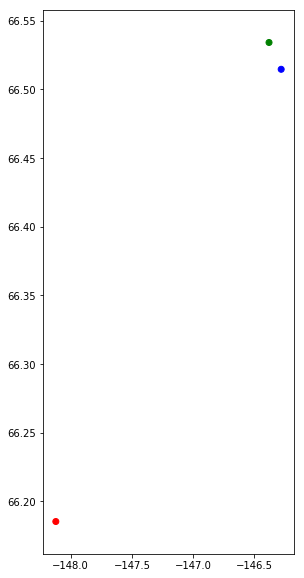

In [2]:
pts_shp = 'sample_pts/sample_pts.shp'
pts = gpd.read_file(pts_shp)

fig, ax = plt.subplots(1, figsize=(4.5,10))
pts.plot(ax=ax,  color=['Red', 'Green', 'Blue'], alpha=1, legend=True)
# ax.legend(loc='middle')

In [4]:
# points 1,2 of 0,1,2 should intersect the GeoEeye scene
ge_scene_ps = CatalogImage(image_ids[-1], acomp=True, pansharpen=True)
ge_scene_ms = CatalogImage(image_ids[-1], acomp=True)

In [5]:
bbox = pts['geometry'][2].buffer(0.003).bounds
ge_ps_aoi = ge_scene_ps.aoi(bbox=bbox)
ge_ms_aoi = ge_scene_ms.aoi(bbox=bbox)

In [6]:
ge_ps_aoi.shape, ge_ms_aoi.shape


((4, 1333, 1333), (4, 333, 333))

In [7]:
%matplotlib qt
fig, ax = plt.subplots(1,2, figsize = (20,10))
titles = ('Pansharpened', 'Multispectral')
for i, data in enumerate([ge_ps_aoi, ge_ms_aoi]):
    ax[i].imshow(bytescale(np.rollaxis(data[[2,1,0], :, :], 0, 3)))
    ax[i].set_title(titles[i])
    #data.plot()
    
plt.show()

KeyboardInterrupt: 

In [3]:
gbdx = Interface()

In [4]:
help(gbdx.vectors.map)

Help on method map in module gbdxtools.vectors:

map(features=None, query=None, style={}, bbox=[-180, -90, 180, 90], zoom=10, api_key=None) method of gbdxtools.vectors.Vectors instance
    Renders a mapbox gl map from a vector service query



In [55]:
# search for other image
from shapely.geometry import box

# query = 'item_type:QB OR item_type:GE01'
# query = 'item_type:GE01'
query = 'item_type:QB02'
query = 'item_type:WV03_VNIR OR item_type:WV02 OR item_type:QB OR item_type:GE01'
query = 'item_type:WV03_VNIR OR item_type:WV02'

for i,pt in enumerate(pts['geometry']):
    
    print('searching for point ', i)
    this_bbox = pt.buffer(0.003).bounds
    aoi = box(*this_bbox).wkt
    recs = gbdx.vectors.query(aoi, query, count=100)
    #print(len(recs))

    cat_ids=[]
    for r in recs:
        
        props = r['properties']
        if not props['attributes']['catalogID'] in cat_ids:
            cat_ids.append(props['attributes']['catalogID'])
            print(props['attributes']['catalogID'], 
                  props['item_date'][0:10], 
                  props['item_type'][1], 
                  props['attributes']['platformName'])

    print(len(cat_ids))
    print('')           


searching for point  0
103001007F793000 2018-05-18 Acquisition WORLDVIEW02
103001007DD65000 2018-05-15 Acquisition WORLDVIEW02
1040010018343C00 2016-02-07 Acquisition WORLDVIEW03_VNIR
10400100185B2400 2016-02-07 Acquisition WORLDVIEW03_VNIR
103001004BAE5E00 2015-10-29 Acquisition WORLDVIEW02
10300100520CFE00 2016-02-14 Acquisition WORLDVIEW02
10300100539AA800 2016-02-14 Acquisition WORLDVIEW02
103001005298CB00 2016-02-08 Acquisition WORLDVIEW02
103001004A074200 2015-10-17 Acquisition WORLDVIEW02
103001004C882F00 2015-10-29 Acquisition WORLDVIEW02
1030010049962800 2015-10-17 Acquisition WORLDVIEW02
103001004A692200 2015-10-25 Acquisition WORLDVIEW02
10300100052D5300 2010-05-24 WV02 WORLDVIEW02
1030010006C8A500 2010-08-12 Acquisition WORLDVIEW02
1030010012785500 2012-03-21 Acquisition WORLDVIEW02
15

searching for point  1
104001003CAA1400 2018-05-24 IDAHOImage WORLDVIEW03_VNIR
103001007D0A7D00 2018-05-22 IDAHOImage WORLDVIEW02
103001007F46C300 2018-05-25 Acquisition WORLDVIEW02
10400100

In [19]:
# points 1,2 of 0,1,2 should intersect the GeoEeye scene
imid = props['attributes']['catalogID']
qb_scene_ps = CatalogImage(imid, acomp=True, pansharpen=True)
qb_scene_ms = CatalogImage(imid, acomp=True)

bbox = pts['geometry'][2].buffer(0.003).bounds
qb_ps_aoi = qb_scene_ps.aoi(bbox=bbox)
qb_ms_aoi = qb_scene_ms.aoi(bbox=bbox)

%matplotlib qt
fig, ax = plt.subplots(1,2, figsize = (20,10))
titles = ('Pansharpened', 'Multispectral')
for i, data in enumerate([qb_ps_aoi, qb_ms_aoi]):
    ax[i].imshow(bytescale(np.rollaxis(data[[2,1,0], :, :], 0, 3)))
    ax[i].set_title(titles[i])
    #data.plot()
    
plt.show()

Exception: Could not find a catalog entry for the given id: 1010010005BA1800

In [81]:
import folium

In [20]:
import shapely
from shapely.wkt import loads
import pandas as pd

poly = loads(aoi)
df = pd.DataFrame({'geometry': poly}, index=[0])

              


In [21]:
gdf = gpd.GeoDataFrame(df)
gdf.crs = {'init': 'epsg:4326', 'no_defs': True}
temp = gdf.to_crs(epsg=32607)

In [22]:
temp['geometry'][0].area,temp['geometry'][0].bounds

(1786.9559892686807,
 (265380.6811039312, 7387172.513682589, 265412.9388229933, 7387241.457027862))

In [23]:
bnds = temp['geometry'][0].bounds
bnds[3] - bnds[1], bnds[2] - bnds[0]

(68.94334527291358, 32.25771906209411)

## search the catalog and view as data frames

In [37]:
def flatten_dict(d):
    def expand(key, value):
        if isinstance(value, dict):
            return [ (key + '.' + k, v) for k, v in flatten_dict(value).items() ]
        else:
            return [ (key, value) ]

    items = [ item for k, v in d.items() for item in expand(k, v) ]

    return dict(items)


# search for other image
from shapely.geometry import box

# query = 'item_type:QB OR item_type:GE01'
# query = 'item_type:GE01'
# query = 'item_type:QB02'
query = 'item_type:WV03_VNIR OR item_type:WV02 OR item_type:QB OR item_type:GE01'

pt_dfs = []
for i,pt in enumerate(pts['geometry']):
    
    print('searching for point ', i)
    this_bbox = pt.buffer(0.003).bounds
    aoi = box(*this_bbox).wkt
    recs = gbdx.vectors.query(aoi, query, count=100)
    print(len(recs))
    pt_dfs.append(pd.DataFrame([flatten_dict(r) for r in recs]))


searching for point  0
31
searching for point  1
76
searching for point  2
49


In [48]:
item_type = 'properties.item_type'
pt0_df = pt_dfs[0]
pt0_sensors = pt0_df.groupby(item_type)

print(pt0_sensors)
for name, group in pt0_sensors:
    pass

TypeError: unhashable type: 'list'

In [51]:
pt0_df[item_type][0][-1]

'WV02'